# IFN619 - Assignment 1 - Part B

## Foundational Techniques

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. Complete the full **QDAVI** data analytics cycle for both questions. Ensure that you complete the cycle by addressing the question with your insights.
3. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
4. Ensure that your code runs without errors, and that your results are appropriate for the question.
5. Use comments in your code to explain what you are doing

In [1]:
from IPython.core.display import display, HTML

first_name = "Ming"
last_name = "Tang"
student_number = "n11267283"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

/tmp/ipykernel_173/3963753610.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

## QUESTION 1

#### Question: 

Using *Bureau of Meteorology* Climate Data Online, investigate the daily rainfall for Brisbane and identify significant periods of time during the last 3 years. Once you have found significant periods of time, compare Brisbane's rainfall for those periods with another Australian city of your choice. What insights can be gained from your analysis, and who might benefit from them?

#### Data:

[BOM Climate Data Online](http://www.bom.gov.au/climate/data/index.shtml?bookmark=136)


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

### 1.1 Question

#### Significant period can be assessed by 2 factors
1. Drought season in Brisbane
2. Rainfall season in Brisbane
3. Compare drought season and rainfall season with Sydney

#### Potential users for the analysis
- Beverage companies create their production schedule base on the amount of rainfall, they may produce lesser drinks in the drought season and vice versa. 
- Should a beverage company build factory in both Brisbane and Sydney base on their rainfall pattern.
- Water Bureau, Brisbane Water and Sydney Water, make their water supply policy base on the season.

#### Question
1. Which period is the drought season?
2. Which period is the rainfall season?
3. Brisbane and Sydney Rainfall Correlation?

### 1.2 Data

In [7]:
PATH = "./image_nn_DUO.h5"
pd.HDFStore(PATH, 'r')


<class 'pandas.io.pytables.HDFStore'>
File path: ./image_nn_DUO.h5

In [3]:
# Brisbane Rainfall data process
df_bris = pd.read_csv("./brisbane_rainfall.csv")
df_bris['date'] = df_bris['Year'].astype(str) + "/" + df_bris["Month"].astype(str) + "/" + df_bris["Day"].astype(str)
df_bris['date'] = pd.to_datetime(df_bris["date"], format="%Y/%m/%d")
df_bris_all = (df_bris
      .drop(columns=["Product code", 
                     "Bureau of Meteorology station number", 
                     "Year", "Month", "Day",
                    "Period over which rainfall was measured (days)",
                    "Quality"], axis=1)
      .set_index('date')
      .loc['20190101':'20211231']
      .dropna()
     )

# Sydney Rainfall data process
df_syd = pd.read_csv("./sydney_rainfall.csv")
df_syd['date'] = df_syd['Year'].astype(str) + "/" + df_syd["Month"].astype(str) + "/" + df_syd["Day"].astype(str)
df_syd['date'] = pd.to_datetime(df_syd["date"], format="%Y/%m/%d")
df_syd_all = (df_syd
      .drop(columns=["Product code", 
                     "Bureau of Meteorology station number", 
                     "Year", "Month", "Day",
                    "Period over which rainfall was measured (days)",
                    "Quality"], axis=1)
      .set_index('date')
      .loc['20190101':'20211231']
      .dropna()
     )

df_syd_all = df_syd_all.loc[df_bris_all.index] 

df = pd.merge(df_bris_all, df_syd_all,  right_index=True, left_index=True)
df = df.rename(columns={"Rainfall amount (millimetres)_x" : "Brisbane_rainfall_(mm)", "Rainfall amount (millimetres)_y" : "Sydney_rainfall_(mm)"})

# Dataframe more than 4mm rainfall in both Brisbane and Sydney
df_1 = df.loc[(df>4).all(axis=1)]
df_1['Year'] = pd.DatetimeIndex(df_1.index).year


/tmp/ipykernel_77/1283115006.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Year'] = pd.DatetimeIndex(df_1.index).year


,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,date
0,IDCJAC0009,40913,1999,1,1,NaN,NaN,NaN,1999-01-01
1,IDCJAC0009,40913,1999,1,2,NaN,NaN,NaN,1999-01-02
2,IDCJAC0009,40913,1999,1,3,NaN,NaN,NaN,1999-01-03
3,IDCJAC0009,40913,1999,1,4,NaN,NaN,NaN,1999-01-04
4,IDCJAC0009,40913,1999,1,5,NaN,NaN,NaN,1999-01-05
...,...,...,...,...,...,...,...,...,...
8502,IDCJAC0009,40913,2022,4,12,0.0,1.0,N,2022-04-12
8503,IDCJAC0009,40913,2022,4,13,0.0,1.0,N,2022-04-13
8504,IDCJAC0009,40913,2022,4,14,1.2,1.0,N,2022-04-14
8505,IDCJAC0009,40913,2022,4,15,0.2,1.0,N,2022-04-15


### 1.3 Analysis

In [4]:
cor = df_bris_all['Rainfall amount (millimetres)'].corr(df_syd_all['Rainfall amount (millimetres)'])
print("Rainfall Correlation between Brisbane and Sydney")
print("correlation : ", cor)
print()
print()
# correlation between Brisbane and Sydney

X = df_bris_all['Rainfall amount (millimetres)'].values.reshape(-1, 1)
y = df_syd_all['Rainfall amount (millimetres)'].values.reshape(-1, 1)

# Monthly rainfall statistics and categoise
df_bris_m = df_bris_all.resample('M')['Rainfall amount (millimetres)'].agg(['sum','max', 'std', 'mean', 'var'])
df_syd_all_m = df_syd_all.resample('M')['Rainfall amount (millimetres)'].agg(['sum','max', 'std', 'mean', 'var'])
df_bris_m['Year'] = "Brisbane-" + df_bris_m.index.year.astype(str)
df_syd_all_m['Year'] = "Sydney-" + df_bris_m.index.year.astype(str)
df_bris_m['Month'] = df_bris_m.index.month
df_syd_all_m['Month'] = df_bris_m.index.month

# Basic statistics data for Brisbane and Sydney Rainfall
print("Brisbane Rainfall Statistics",df_bris_all.describe())
print("Sydney Rainfall Statistics",df_syd_all.describe())

Rainfall Correlation between Brisbane and Sydney
correlation :  0.2437568558323062


Brisbane Rainfall Statistics        Rainfall amount (millimetres)
count                    1064.000000
mean                        2.881203
std                        10.681431
min                         0.000000
25%                         0.000000
50%                         0.000000
75%                         0.450000
max                       130.400000
Sydney Rainfall Statistics        Rainfall amount (millimetres)
count                    1064.000000
mean                        3.432331
std                        11.104899
min                         0.000000
25%                         0.000000
50%                         0.000000
75%                         1.600000
max                       187.000000


### 1.4 Visualisation

Text(0.5, 1.0, 'Linear Regression- Correlation between Brisbane and Sydney')

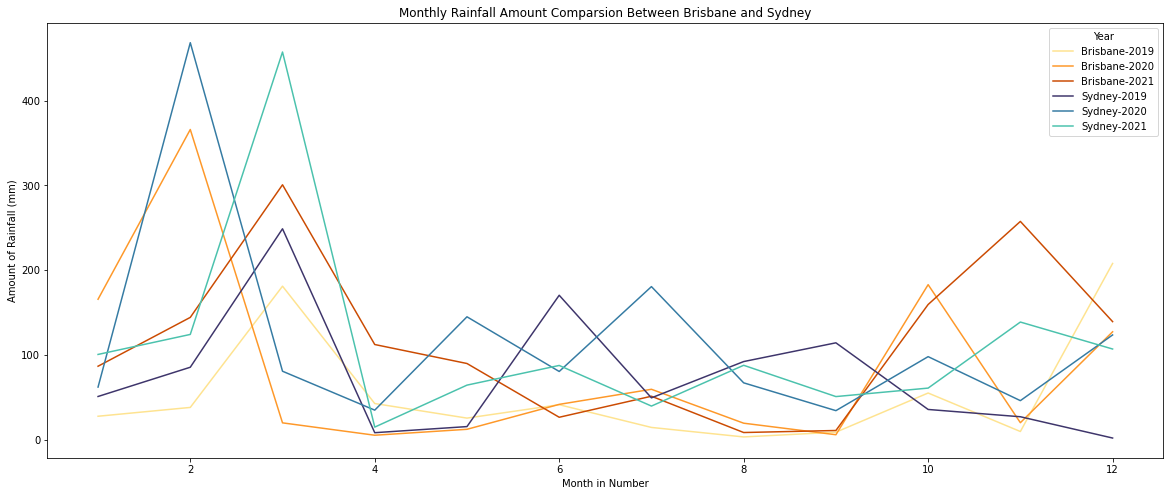

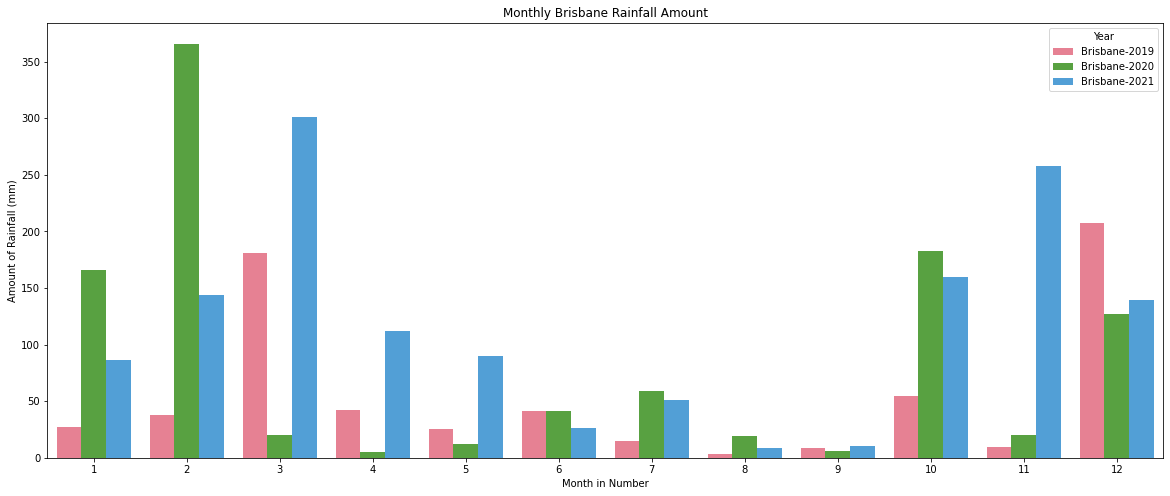

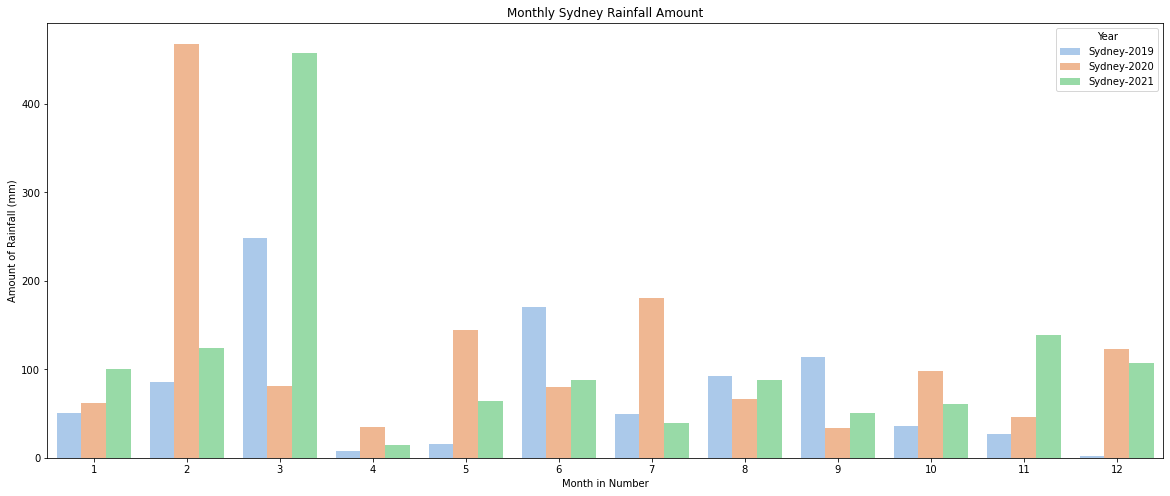

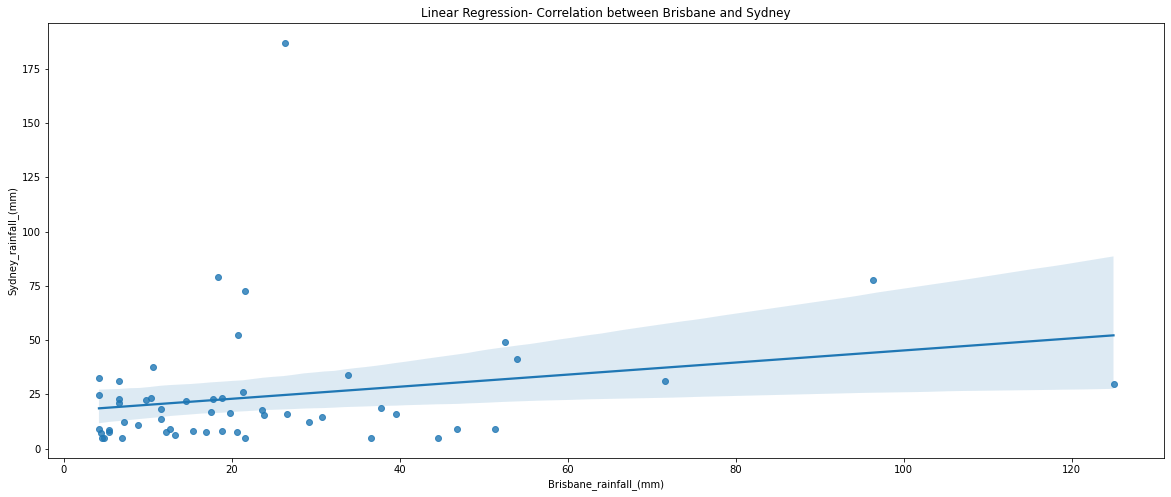

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

cmap = sns.color_palette("Set2", 3)
p1 = sns.color_palette("pastel", 3)
p2 = sns.color_palette("husl", 3)
p3 = sns.color_palette("YlOrBr", 3)
p4 = sns.color_palette("mako", 3)


fig2, ax2=plt.subplots(figsize = (20,8))
sns.lineplot(x="Month", y="sum",hue='Year',data=df_bris_m,ax=ax2, palette=p3) 
sns.lineplot(x="Month", y="sum",hue='Year',data=df_syd_all_m,ax=ax2, palette=p4)
plt.title("Monthly Rainfall Amount Comparsion Between Brisbane and Sydney")
plt.ylabel("Amount of Rainfall (mm)")
plt.xlabel("Month in Number")

fig3, ax3 = plt.subplots(figsize = (20,8))
sns.barplot(x="Month", y="sum", hue="Year" ,data=df_bris_m, ax=ax3, palette=p2)
plt.title("Monthly Brisbane Rainfall Amount")
plt.ylabel("Amount of Rainfall (mm)")
plt.xlabel("Month in Number")


plt.subplots(figsize = (20,8))
sns.barplot(x="Month", y="sum", hue="Year" ,data=df_syd_all_m, palette=p1)
plt.title("Monthly Sydney Rainfall Amount")
plt.ylabel("Amount of Rainfall (mm)")
plt.xlabel("Month in Number")


# Linear Regression between Brisbane and Sydney
plt.subplots(figsize = (20,8))
sns.regplot(x="Brisbane_rainfall_(mm)", y="Sydney_rainfall_(mm)", data=df_1)
plt.title('Linear Regression- Correlation between Brisbane and Sydney')


### 1.5 Insight

- Which period is the drought season?
1. Brisbane has relative low rainfall from April to September, it is mostly lower than 100mm per month during the period.
- Which period is the rainfall season?
2. Conversely, Brisbane has heavier rainfall from  October to March, it is general over 120mm per month during the period.
- Brisbane and Sydney Rainfall Correlation?
3. correlation of Brisbane rainfall and Sydney rainfall has 0.24, which explains they have a mild to low correlation in turns of 2 places rainfall.

---
## QUESTION 2

#### Question: 
Using *The Guardian* API, compare Australian and United Kingdom headlines about the war in Ukraine. What can we learn about differences and similarities between the news presented to Australia and the UK?

#### Data:
[The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)


In [9]:
import requests
import json
import re
from nltk import word_tokenize, pos_tag_sents
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### 2.1 Question

1. What is the frequency of the words they are using in the UK and Australia?
2. What country has been mentioned in both UK and Australia?
3. What country has been mentioned respective UK and Australia?
4. What has been more focusly reported in UK and Australia?

### 2.2 Data

## UK Headline Data

In [10]:
apiKey = "153bcd4c-52b1-4a65-818d-cb727fab5dc7"
searchContent = "Ukraine%20war"
fromDate = "2022-02-01"
office = "uk"

URL = f"https://content.guardianapis.com/search?q={searchContent}&from-date={fromDate}&production-office={office}&api-key={apiKey}&page-size=50"
res = requests.get(URL)
j = json.loads(res.text)
pages = j['response']['pages']

sectionNames = []
webPublicationDates = []
webTitles = []
j
# for p in range(1,pages):

#     URL_UK = f"https://content.guardianapis.com/search?q={searchContent}&from-date={fromDate}&production-office={office}&api-key={apiKey}&page-size=50&page={p}"
#     res = requests.get(URL_UK)
#     j_page = json.loads(res.text)
#     r = j_page['response']['results']

#     for page_r in r:    
#         sectionNames.append(page_r['sectionName'])
#         webPublicationDates.append(page_r['webPublicationDate'])
#         webTitles.append(page_r['webTitle'])

# d = {"sectionNames": sectionNames, "webPublicationDates" : webPublicationDates, "webTitles" : webTitles}
# pd.DataFrame(data=d).to_csv("./uk_headlines.csv",index=False)    

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 3569,
  'startIndex': 1,
  'pageSize': 50,
  'currentPage': 1,
  'pages': 72,
  'orderBy': 'relevance',
  'results': [{'id': 'world/2022/may/15/war-enabling-not-war-winning-how-are-drones-affecting-the-ukraine-war',
    'type': 'article',
    'sectionId': 'world',
    'sectionName': 'World news',
    'webPublicationDate': '2022-05-15T07:00:25Z',
    'webTitle': '‘War-enabling, not war-winning’: how are drones affecting the Ukraine war?',
    'webUrl': 'https://www.theguardian.com/world/2022/may/15/war-enabling-not-war-winning-how-are-drones-affecting-the-ukraine-war',
    'apiUrl': 'https://content.guardianapis.com/world/2022/may/15/war-enabling-not-war-winning-how-are-drones-affecting-the-ukraine-war',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'business/2022/apr/19/imf-cuts-global-growth-forecast-over-ukraine-war',
    'type': 'article',
    'sectionId': 'business',
   

## Australia Headlines Data

In [8]:
apiKey = "INSERTYOURAPIKEY"
searchContent = "Ukraine%20war"
fromDate = "2022-02-01"
office = "aus"

URL = f"https://content.guardianapis.com/search?q={searchContent}&from-date={fromDate}&production-office={office}&api-key={apiKey}&page-size=50"
res = requests.get(URL)
j = json.loads(res.text)
pages = j['response']['pages']

sectionNames = []
webPublicationDates = []
webTitles = []

for p in range(1,pages):
    
    URL_AUS = f"https://content.guardianapis.com/search?q={searchContent}&from-date={fromDate}&production-office={office}&api-key={apiKey}&page-size=50&page={p}"
    res = requests.get(URL_AUS)
    j_page = json.loads(res.text)
    r = j_page['response']['results']
    
    for page_r in r:    
        sectionNames.append(page_r['sectionName'])
        webPublicationDates.append(page_r['webPublicationDate'])
        webTitles.append(page_r['webTitle'])


d = {"sectionNames": sectionNames, "webPublicationDates" : webPublicationDates, "webTitles" : webTitles}
# pd.DataFrame(data=d).to_csv("./aus_headlines.csv",index=False)

## Uk Headline Data cleaning

In [9]:
df_uk = pd.read_csv("./uk_headlines.csv").sort_values(by="webTitles")

df_uk.sectionNames = df_uk.sectionNames.str.lower()

df_uk = df_uk[df_uk.sectionNames.str.contains("news")]

df_uk["webPublicationDates"] = df_uk.webPublicationDates.str.replace("[a-zA-Z]+"," ")

df_uk["webPublicationDates"] = pd.to_datetime(df_uk["webPublicationDates"], format="%Y-%m-%dT%H:%M:%S")

df_uk = df_uk.drop_duplicates(subset=["webPublicationDates"], keep='first')

# Word tokenize
df_uk['webTitles'] = df_uk['webTitles'].str.replace(r"[^a-zA-Z0-9]+"," ").str.lower()

df_uk['words'] = df_uk.apply(lambda row : word_tokenize(row['webTitles']), axis=1)

stop_words = stopwords.words("english")

stop_words.append("says")
stop_words.append("day")
stop_words.append("russian")
stop_words.append("russians")
stop_words.append("know")
stop_words.append("thing")
stop_words.append("ukrainians")
stop_words.append("new")
stop_words.append("could")
stop_words.append("first")
stop_words.append("briefing")
stop_words.append("morning")
stop_words.append("mail")
stop_words.append("ukrainian")
stop_words.append("happened")

stop_words = set(stop_words)


df_uk['words'] = df_uk['words'].apply(
    lambda sent : [ word for word in sent if word not in (stop_words)]
)

ps = PorterStemmer()

df_uk['words_stemming'] = df_uk['words'].apply(
    lambda sent : [ ps.stem(word) for word in sent]
)

df_uk['words_pos_tag'] = df_uk['words'].apply(lambda sent : nltk.pos_tag(sent))

/tmp/ipykernel_173/772238307.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_uk["webPublicationDates"] = df_uk.webPublicationDates.str.replace("[a-zA-Z]+"," ")
/tmp/ipykernel_173/772238307.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_uk['webTitles'] = df_uk['webTitles'].str.replace(r"[^a-zA-Z0-9]+"," ").str.lower()


In [10]:
df_aus = pd.read_csv("./aus_headlines.csv").sort_values(by="webTitles")

# Clean Section names - lower the letters
df_aus.sectionNames = df_aus.sectionNames.str.lower()

# Pick only the news section, no opinion or commentary
df_aus = df_aus[df_aus.sectionNames.str.contains("news")]

# Reformat the date 
df_aus["webPublicationDates"] = df_aus.webPublicationDates.str.replace("[a-zA-Z]+"," ")

df_aus["webPublicationDates"] = pd.to_datetime(df_aus["webPublicationDates"], format="%Y-%m-%dT%H:%M:%S")

# Word tokenize
df_aus['webTitles'] = df_aus['webTitles'].str.replace(r"[^a-zA-Z0-9]+"," ").str.lower()

df_aus['words'] = df_aus.apply(lambda row : word_tokenize(row['webTitles']), axis=1)

stop_words = stopwords.words("english")

stop_words.append("says")
stop_words.append("day")
stop_words.append("russian")
stop_words.append("russians")
stop_words.append("know")
stop_words.append("thing")
stop_words.append("ukrainians")
stop_words.append("new")
stop_words.append("could")
stop_words.append("first")
stop_words.append("briefing")
stop_words.append("morning")
stop_words.append("mail")
stop_words.append("ukrainian")
stop_words.append("happened")

stop_words = set(stop_words)


df_aus['words'] = df_aus['words'].apply(
    lambda sent : [ word for word in sent if word not in (stop_words)]
)

ps = PorterStemmer()

df_aus['words_stemming'] = df_aus['words'].apply(
    lambda sent : [ ps.stem(word) for word in sent]
)

df_aus['words_pos_tag'] = df_aus['words'].apply(lambda sent : nltk.pos_tag(sent))

/tmp/ipykernel_173/2115534125.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_aus["webPublicationDates"] = df_aus.webPublicationDates.str.replace("[a-zA-Z]+"," ")
/tmp/ipykernel_173/2115534125.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df_aus['webTitles'] = df_aus['webTitles'].str.replace(r"[^a-zA-Z0-9]+"," ").str.lower()


### 2.3 Analysis

In [11]:
# Analysis UK headline wording Frequency
UKwords_list = df_uk.words.values.tolist()

flat_list = [item for sublist in UKwords_list for item in sublist]

F_ukwords_list = nltk.FreqDist(flat_list)


# Analysis AUS headline wording Frequency
AUSwords_list = df_aus.words.values.tolist()

flat_list = [item for sublist in AUSwords_list for item in sublist]

# figF, axF= plt.subplots(figsize = (20,8))
F_auswords_list = nltk.FreqDist(flat_list)
# F_auswords_list.plot(25, cumulative=False, ax=axF)


### 2.4 Visualisation

Text(0, 0.5, 'Number of Frequency')

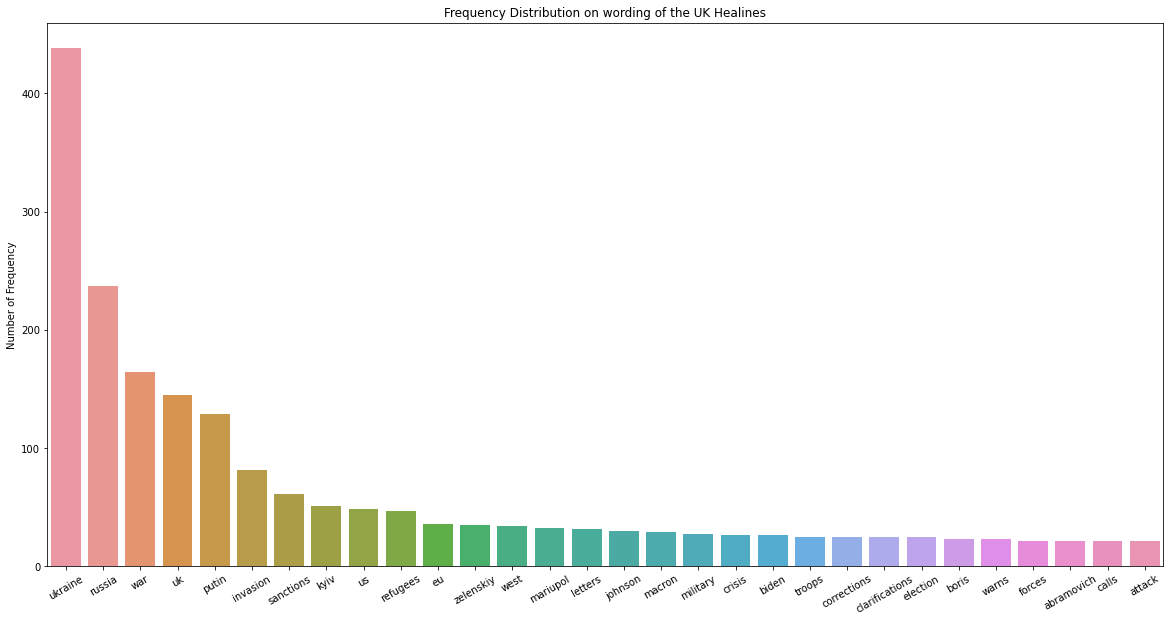

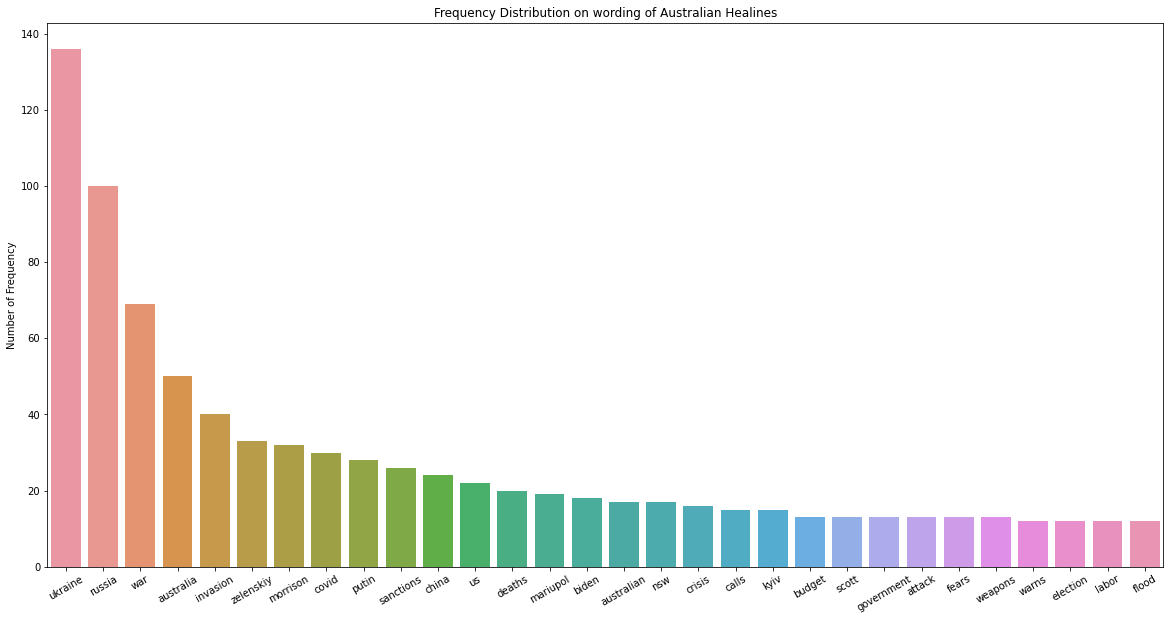

In [12]:


## Creating FreqDist for whole BoW, keeping the 20 most common tokens
# all_fdist = FreqDist(all_song_tokens).most_common(20)

UK_headlines_fdist = F_ukwords_list.most_common(30)

AUS_headlines_fdist = F_auswords_list.most_common(30)

## Conversion to Pandas series via Python Dictionary for easier plotting
UK_headlines_fdist_series = pd.Series(dict(UK_headlines_fdist))
AUS_headlines_fdist_series = pd.Series(dict(AUS_headlines_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
sns.barplot(x=UK_headlines_fdist_series.index, y=UK_headlines_fdist_series.values, ax=ax)
plt.xticks(rotation=30);
plt.title("Frequency Distribution on wording of the UK Healines")
plt.ylabel("Number of Frequency")

fig, ax1 = plt.subplots(figsize=(20,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
sns.barplot(x=AUS_headlines_fdist_series.index, y=AUS_headlines_fdist_series.values, ax=ax1)
plt.xticks(rotation=30);
plt.title("Frequency Distribution on wording of Australian Healines")
plt.ylabel("Number of Frequency")



### 2.5 Insight

- What is the frequency of the words they are using in the UK and Australia?
1. The top 4 frequecy of wording is similar which is ukraine, russia, war and UK/Australia which has mentioned its own area. The other most frequent words are quite different in UK and Australian Headline. UK headlines tend to mention Britian and EU leaders, European area or countries. Australia headlines, interestingly, would tend to mention the perspective of China in Ukraine-Russia war, in conjunction with Scott Morrison perspective.
- What country has been mentioned in both UK and Australia?
2. UK and Australian headlines has mentioned Ukraine, Russia and US.
- What country has been mentioned respective UK and Australia?
3. UK headlines mentioned about EU, while Australian headlines mentioned about China
- What has been more focusly reported in UK and Australia?
4. UK and Australian headlines are reporting from their own area perspective. UK headlines mentioned EU where is the UK's neighboor, whereas Australian headlines would be more interested on how China take its stand on the war.
